# # Minimos cuadrados: Caso Exponencial.

 El caso exponencial de minimos cuadrados sigue el mismo estandar de ecuaciones que el caso discreto, sin embargo al caso exponencial se le aplica un logaritmo natural a la nube de puntos en "Y".
 
 Ecuaciones:
 
 n: Numero de funciones-menos la unidad.
 
 m: Numero de nodos menos la unidad.
 
 $$y = ce^{kx}$$
 
 
 $$ln(c) = ln(ce^{kx})$$
 
 
 $$ln(y) = ln(c)+kx, \ c_0 = ln(y), \ c_1 = k$$
 
 $$ln(y) = c_0 + c_1x$$
 
 
 $$A = \sum_{i=0}^{m}\begin{bmatrix}1 & x_i \\ x_1 & x_i^{2} \end{bmatrix}$$
 
  $$b_{\ nx1} = \sum_{i=0}^{m}\begin{bmatrix}1 \\ x_1 \end{bmatrix}ln(f(x_i)))$$

 
 $$y = ce^{k}$$
 
 
 $$c = e^{c_0}$$
 
 
 $$k = c_1$$
 
 
 $$y = e^{c_0}e^{c_1x}$$

In [1]:
from ipywidgets import widgets 
from IPython.display import display, Math, Latex
from IPython.core.display import display, HTML
from sympy import *
from numpy import * 
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

init_printing()

In [3]:
print("Ingrese los valores en x:")
text_x=widgets.Text();
display(text_x)
print("Ingrese los valores en y:")
text_y=widgets.Text()
display(text_y)


Ingrese los valores en x:


Text(value='')

Ingrese los valores en y:


Text(value='')

In [4]:
xi = text_x.value.split(",")
xi = set(xi)
yi= text_y.value.split(",")
if len(xi)==len(yi):
    try:
        xi = list(map(float, xi))
        yi = list(map(float, yi))
        xi = sorted(xi)
    except:
        display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar que sean valores numericos.</h3>"))
else:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar logitud de valores.</h3>"))

In [5]:
x = Symbol('x')
e = Symbol('e')
rs = Function('rs')(x)
mf = Function('mf')(x)
mft = Function('mft')(x)
px = Function('px')(x)

wizzard = [0]*(2)
for i in range(0,2):
    wizzard[i]=x**i
mf = Matrix([wizzard])

#print(mf)

mft=mf.T
#display(mft)

#print(mft)
rs=mft*mf
display(HTML("<h3>Matriz de ecuaciones:</h3>"))
display(rs)

a = zeros(shape=(2,2))
for i in range(0,len(xi)):
    a = a + rs.subs(x,xi[i])
#display(a)

b = zeros(shape=(2,1))
for i in range(0,len(xi)):
    b = b + mft.subs(x,xi[i])*ln(yi[i])
#display(b)
c = (a.inv()*b)
display(HTML("<h3>Matriz de coeficientes a los cuales se les aplica Ln:</h3>"))
display(c)


final = [0]*(2)
px=0
for i in range(0,1):
    final[i]= np.float(c[i])
    final[i] = np.exp(final[i])*(e**(c[i-1]*x))

    px = px+final[i]
    
display(HTML("<h3>Polinomio Interpolante</h3>"))
display(Math("P(x)="+latex(px)))

⎡1  x ⎤
⎢     ⎥
⎢    2⎥
⎣x  x ⎦

⎡-0.156677843815531⎤
⎢                  ⎥
⎣0.813814742723597 ⎦

<IPython.core.display.Math object>

In [7]:
print("Evaluar polinomio en un punto")
text_value = widgets.BoundedFloatText(
    value=0.0,
    step=0.1,
    description='x:',
    disabled=False
)
display(text_value)

Evaluar polinomio en un punto


BoundedFloatText(value=0.0, description='x:', step=0.1)

In [8]:
if(text_value != ""):
    display(Math("P("+latex(text_value.value)+")="+latex(px.subs(x,text_value.value))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

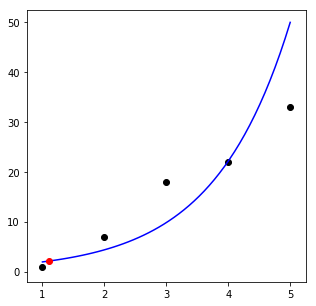

In [9]:
if len(xi)==len(yi):
    try:
        px = px.subs(e,np.exp(1))
        display(HTML("<h3>Grafica del polinomio:</h3>"))
        display(Math("P(x)="+latex(px)))
        fig,ax = plt.subplots(figsize=(5,5))
        f_l = lambdify(x,px)
        xv = linspace(xi[0],xi[len(xi)-1],50)
        ax.plot(xv, f_l(xv),color='blue');
        ax.scatter(xi,yi,color='black', marker='o');
        ax.plot(text_value.value,px.subs(x,text_value.value), color ='red',marker='o');
    except:
        display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica los datos introducidos</h2>"))
else:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar longuitud de los datos en x y.</h3>"))